In [241]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [266]:
df_companies=pd.read_csv("sp500_companies.csv")

In [243]:
#Checking for the head values
df_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,142.65,2269290430464,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.064414
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,247.40,1857474134016,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.052725
2,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,93.71,1214828249088,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.034483
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,93.95,1213805756416,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.034454
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,90.35,921723600896,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.026163


In [244]:
#Dimensionality of the data
df_companies.shape

(494, 16)

In [245]:
#Data Column size and datatype
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             494 non-null    object 
 1   Symbol               494 non-null    object 
 2   Shortname            494 non-null    object 
 3   Longname             494 non-null    object 
 4   Sector               494 non-null    object 
 5   Industry             494 non-null    object 
 6   Currentprice         494 non-null    float64
 7   Marketcap            494 non-null    int64  
 8   Ebitda               451 non-null    float64
 9   Revenuegrowth        481 non-null    float64
 10  City                 494 non-null    object 
 11  State                474 non-null    object 
 12  Country              494 non-null    object 
 13  Fulltimeemployees    491 non-null    float64
 14  Longbusinesssummary  494 non-null    object 
 15  Weight               494 non-null    flo

In [246]:
#Description of data
df_companies.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,494.000000,4.940000e+02,4.510000e+02,481.000000,4.910000e+02,494.000000
mean,168.406761,7.131499e+10,6.059720e+09,0.827798,5.576390e+04,0.002024
std,288.791152,1.712502e+11,1.214120e+10,12.492324,1.446813e+05,0.004861
min,5.400000,4.111557e+09,-2.681000e+09,-0.643000,1.050000e+02,0.000117
25%,58.322500,1.608312e+10,1.415950e+09,0.021000,9.459000e+03,0.000457
50%,102.730000,3.008050e+10,2.585000e+09,0.090000,1.951900e+04,0.000854
75%,187.527500,6.293776e+10,5.618600e+09,0.195000,5.465000e+04,0.001787
max,4694.280000,2.269290e+12,1.305410e+11,270.791000,2.300000e+06,0.064414


In [247]:
#Dropping Null Values
df_companies=df_companies.dropna()

In [248]:
df_top_companies=df_companies.groupby(['Symbol'])['Marketcap'].sum()
df_top_companies=df_top_companies.reset_index()
df_top_companies.head()

,Symbol,Marketcap
0,A,46102597632
1,AAL,8838653952
2,AAP,8686000128
3,AAPL,2269290430464
4,ABBV,293549998080


In [249]:
#Top Companies with High Market Capital
df_top_companies=df_top_companies.sort_values(by=['Marketcap'],ascending=False)
print("Top Companies based on MarketCap: ")
df_top_companies

Top Companies based on MarketCap: 


,Symbol,Marketcap
3,AAPL,2269290430464
280,MSFT,1857474134016
183,GOOGL,1214828249088
182,GOOG,1213805756416
31,AMZN,921723600896
...,...,...
248,LNC,5683297792
301,NWL,5657820160
23,ALK,5588482560
252,LUMN,5529006080


In [250]:
#top_companies=['NCLH','CCL','RCL','LYV','CTRA']
top_companies=['AAPL','MSFT','GOOGL','ALK', 'LUMN', 'VNO']

In [252]:
df_stocks=pd.read_csv("sp500_stocks.csv")
df_stocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1638266,2022-12-02,ZTS,157.419998,157.419998,157.910004,152.399994,154.110001,1946100.0
1638267,2022-12-05,ZTS,155.330002,155.330002,156.669998,154.580002,155.630005,2087400.0
1638268,2022-12-06,ZTS,153.050003,153.050003,155.500000,152.089996,154.220001,1964800.0
1638269,2022-12-07,ZTS,150.250000,150.250000,153.789993,149.380005,152.960007,2444100.0


In [253]:
df_stocks=df_stocks[df_stocks.Symbol.isin(top_companies)]
df_stocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
52112,2010-01-04,ALK,7.774136,8.717500,8.820000,8.600000,8.705000,1802400.0
52113,2010-01-05,ALK,8.199961,9.195000,9.235000,8.690000,8.690000,3052800.0
52114,2010-01-06,ALK,8.126390,9.112500,9.285000,9.050000,9.062500,2994000.0
52115,2010-01-07,ALK,8.084030,9.065000,9.420000,9.040000,9.137500,2887200.0
52116,2010-01-08,ALK,7.923509,8.885000,9.215000,8.810000,9.057500,2457600.0
...,...,...,...,...,...,...,...,...
1553584,2022-12-02,VNO,24.340000,24.340000,24.580000,24.139999,24.440001,2743300.0
1553585,2022-12-05,VNO,22.900000,22.900000,23.990000,22.900000,23.940001,4470300.0
1553586,2022-12-06,VNO,22.010000,22.010000,23.010000,21.780001,22.959999,4030400.0
1553587,2022-12-07,VNO,21.290001,21.290001,21.870001,20.940001,21.799999,5001600.0


In [254]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [255]:
missing_values_table(df_stocks)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [256]:
df_stocks=df_stocks.dropna()

In [257]:
missing_values_table(df_stocks)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [258]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

In [259]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 52112 to 1553588
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19542 non-null  datetime64[ns]
 1   Symbol     19542 non-null  object        
 2   Adj Close  19542 non-null  float64       
 3   Close      19542 non-null  float64       
 4   High       19542 non-null  float64       
 5   Low        19542 non-null  float64       
 6   Open       19542 non-null  float64       
 7   Volume     19542 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.3+ MB


In [260]:
fig = px.line(df_stocks, x='Date', y="Close", color="Symbol")
fig.show()

In [261]:
import pandas as pd 
import numpy as np 
from datetime import datetime

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [262]:
from dash import Dash, dcc, html, Input, Output

In [ ]:
app = Dash(__name__)


app.layout = html.Div([
    html.H4('S&P Stocks Price Analysis'),
    dcc.Graph(id="time-series-chart"),
    html.P("Select a Value:"),
    dcc.Dropdown(
        id="ticker",
        options=["Close", "Adj Close","High", "Low", "Open", "Volume"],
        value="Close",
        clearable=False,
    ),   

])


@app.callback(
    Output("time-series-chart", "figure"), 
    Input("ticker", "value"))
def display_time_series(ticker):
    df = df_stocks
    fig = px.line(df, x='Date', y=ticker, color='Symbol', facet_col= "Symbol")
    return fig


app.run_server(debug=False, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

In [181]:
df_stocks=pd.read_csv("sp500_stocks.csv")
df_stocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1638266,2022-12-02,ZTS,157.419998,157.419998,157.910004,152.399994,154.110001,1946100.0
1638267,2022-12-05,ZTS,155.330002,155.330002,156.669998,154.580002,155.630005,2087400.0
1638268,2022-12-06,ZTS,153.050003,153.050003,155.500000,152.089996,154.220001,1964800.0
1638269,2022-12-07,ZTS,150.250000,150.250000,153.789993,149.380005,152.960007,2444100.0


-------Stock:AAPL------
ADF Statistic: 0.09883909270511192
P-Value: 0.9659817441240705
ndiffs required:1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2605
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2613.107
Date:                Tue, 13 Dec 2022   AIC                           5232.215
Time:                        18:13:52   BIC                           5249.809
Sample:                             0   HQIC                          5238.589
                               - 2605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2657      0.029     -9.025      0.000      -0.323      -0.208
ma.L1          0.0939     

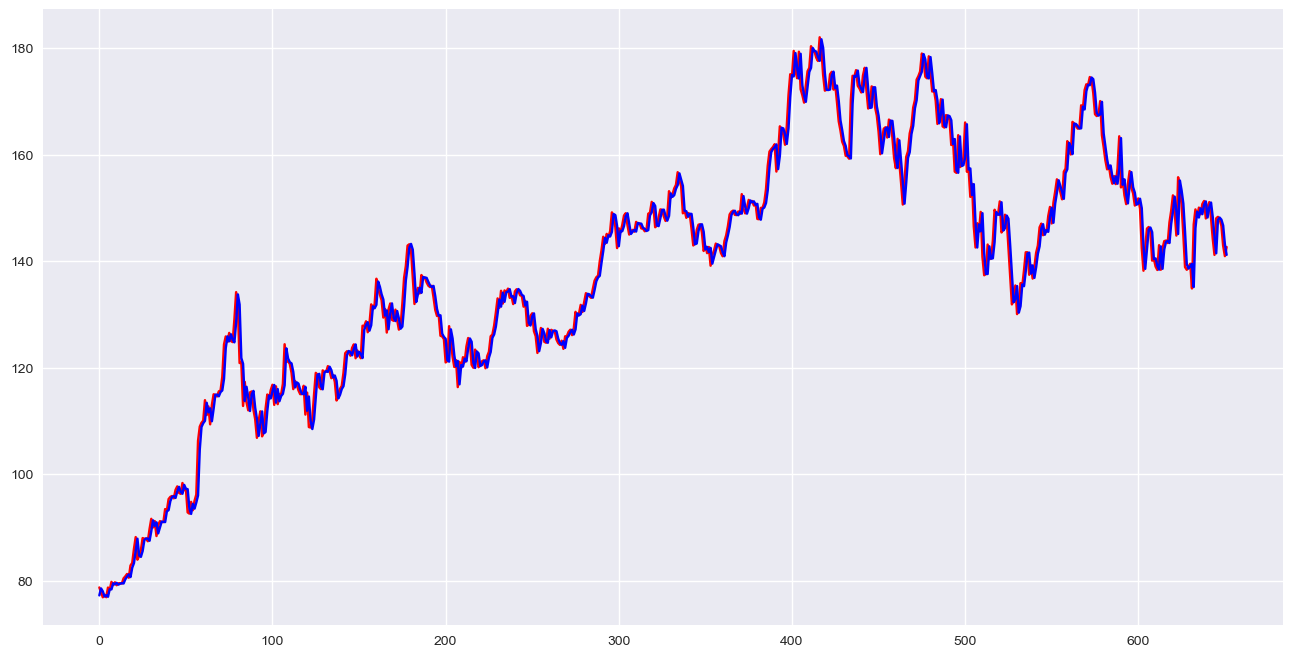

----------------------End of StockAAPL results-----------
-------Stock:MSFT------
ADF Statistic: 0.2690439177569431
P-Value: 0.9758788021637298
ndiffs required:1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2605
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4498.947
Date:                Tue, 13 Dec 2022   AIC                           9003.895
Time:                        18:18:33   BIC                           9021.489
Sample:                             0   HQIC                          9010.269
                               - 2605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3110      0.014    -22.922     

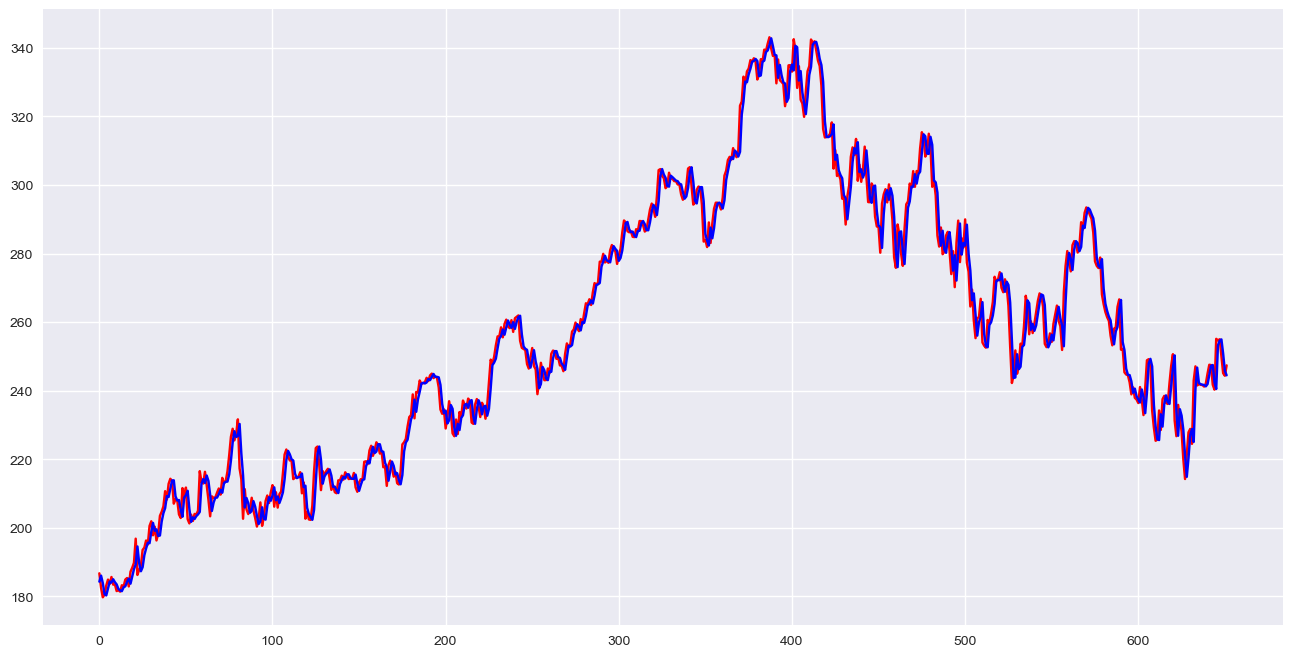

----------------------End of StockMSFT results-----------
-------Stock:GOOG------
ADF Statistic: -0.4756203019018002
P-Value: 0.8966868691105078
ndiffs required:1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2605
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2532.405
Date:                Tue, 13 Dec 2022   AIC                           5070.810
Time:                        18:21:58   BIC                           5088.404
Sample:                             0   HQIC                          5077.184
                               - 2605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1160      0.063     -1.832    

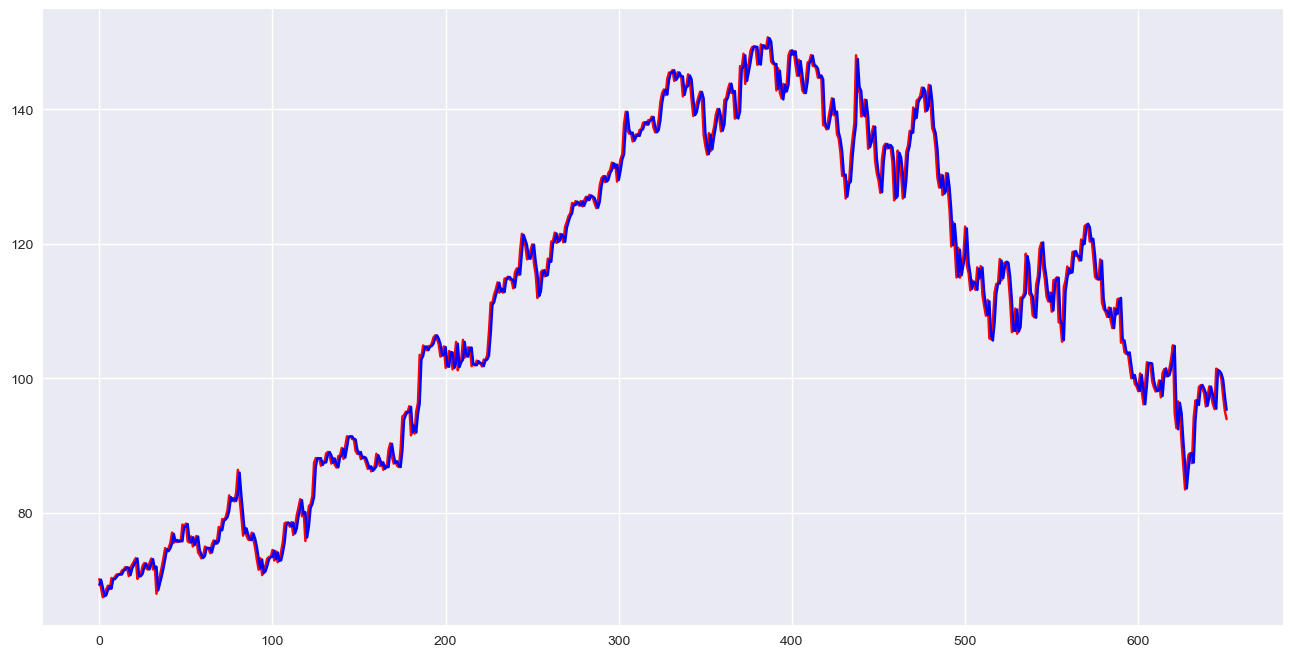

----------------------End of StockGOOG results-----------
-------Stock:ALK------
ADF Statistic: -1.8887885572820107
P-Value: 0.3373535687974833
ndiffs required:1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2605
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3876.631
Date:                Tue, 13 Dec 2022   AIC                           7759.262
Time:                        18:26:25   BIC                           7776.856
Sample:                             0   HQIC                          7765.636
                               - 2605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2668      0.280     -0.954     

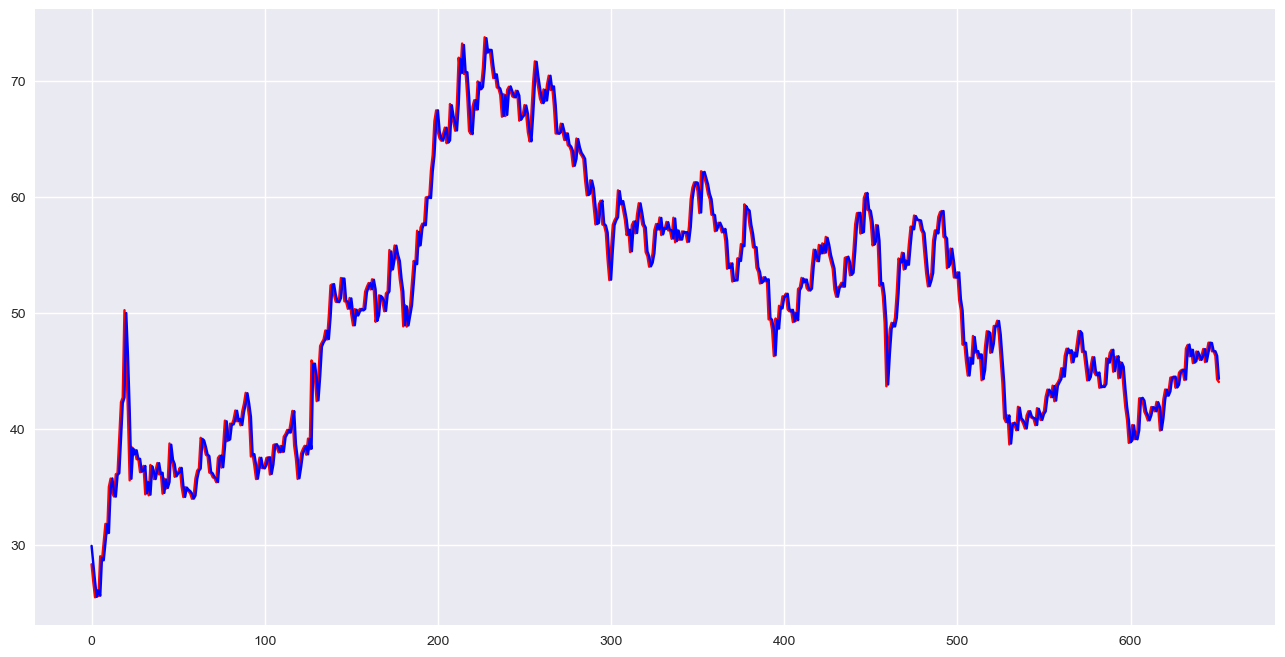

----------------------End of StockALK results-----------
-------Stock:LUMN------
ADF Statistic: -0.5635094163343277
P-Value: 0.879016084564448
ndiffs required:1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2605
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1857.119
Date:                Tue, 13 Dec 2022   AIC                           3720.238
Time:                        18:31:18   BIC                           3737.833
Sample:                             0   HQIC                          3726.613
                               - 2605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7867      0.194      4.056      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Test RMSE: 0.336


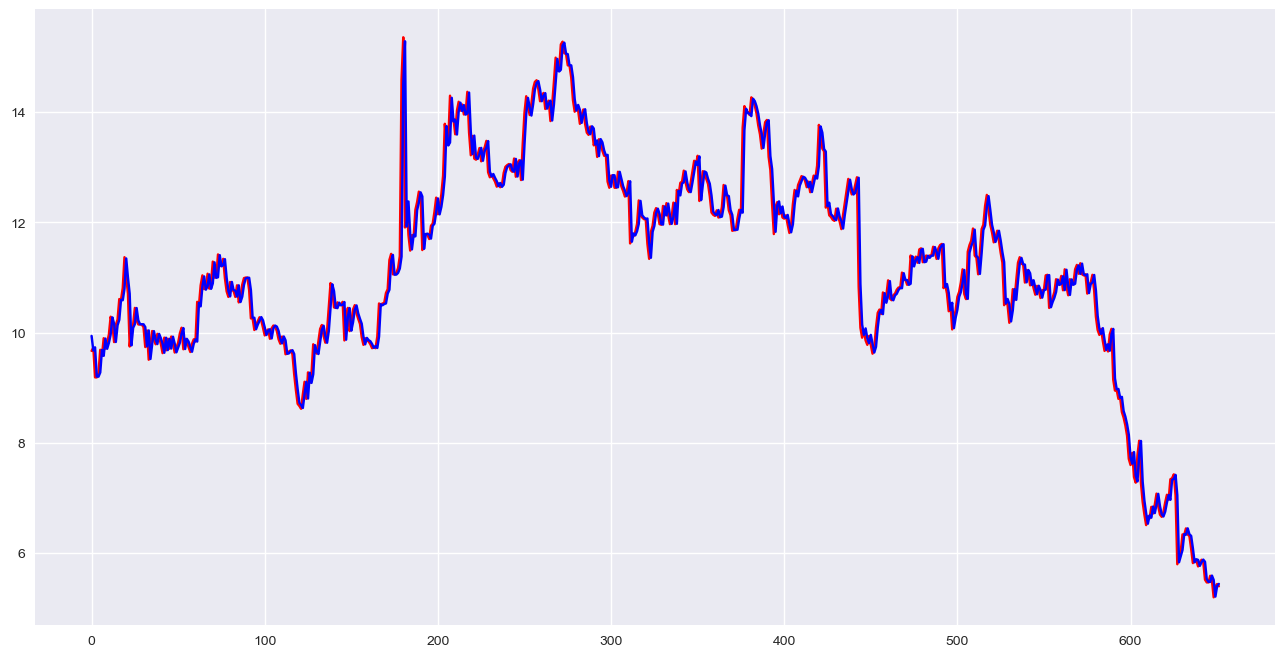

----------------------End of StockLUMN results-----------
-------Stock:VNO------
ADF Statistic: -0.6036477528919174
P-Value: 0.8701556519939058
ndiffs required:1
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2605
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3580.011
Date:                Tue, 13 Dec 2022   AIC                           7166.021
Time:                        18:38:32   BIC                           7183.616
Sample:                             0   HQIC                          7172.396
                               - 2605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5969      0.169     -3.533     

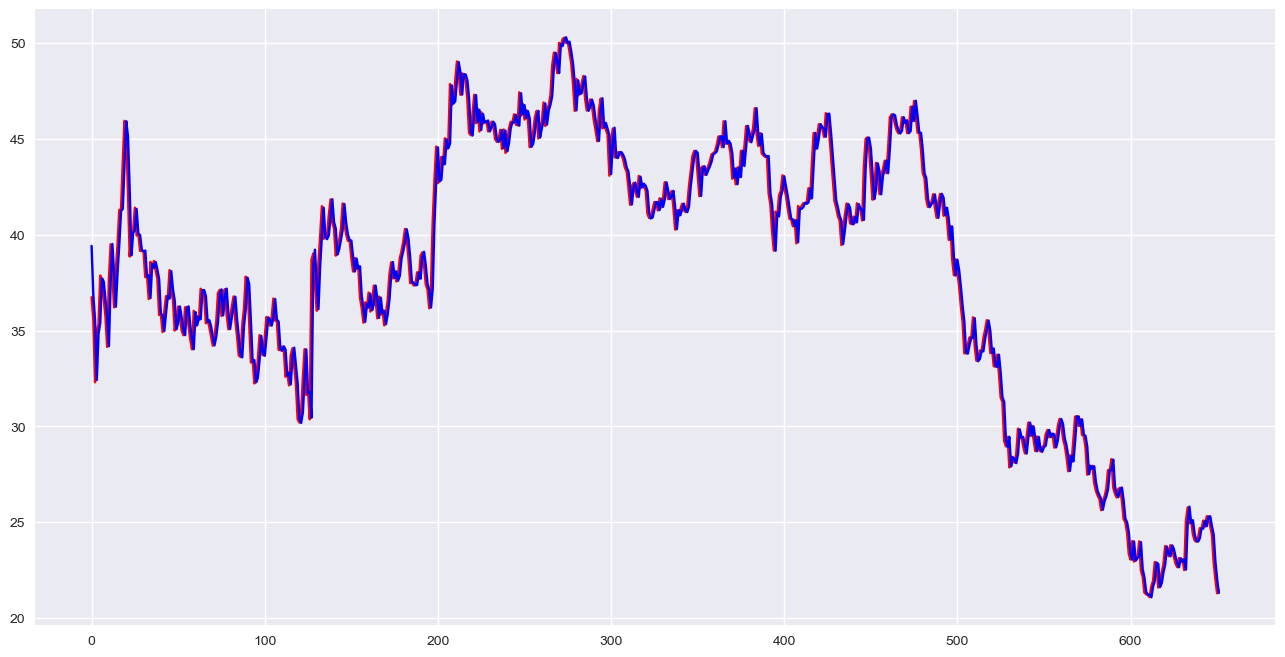

----------------------End of StockVNO results-----------


In [201]:
from statsmodels.tsa.stattools import adfuller
#ACF
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from pmdarima.arima.utils import ndiffs
#P--AR
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt



model_company = ["AAPL","MSFT", "GOOG", "ALK", "LUMN", "VNO"]
for i in model_company:
    print("-------Stock:"+str(i)+"------");
    df=df_stocks[df_stocks.Symbol==i]
    #print(df.head(2))
    df=df[['Date','Close']].dropna()
    #print(df.head(2))
    df['Date']=pd.to_datetime(df['Date'])
    #print(df.dtypes)
    df.set_index('Date',inplace=True)
    #print(df.head(2))
    
    #Stationary

    #ADF
    result = adfuller(df)
    print(f"ADF Statistic: {result[0]}")
    print(f"P-Value: {result[1]}")
    print("ndiffs required:" + str(ndiffs(df.Close, test="adf")))
    
    
    train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

    train_ar = train_data.values
    test_ar = test_data.values


    model = ARIMA(train_ar, order=(1,1,1))
    model_fit = model.fit()
    print(model_fit.summary())


    residuals = pd.DataFrame(model_fit.resid)


    # summary stats of residuals
    #print(residuals.describe())


    size = int(len(df) * 0.80)
    train, test = df[0:size], df[size:len(df)]



    X = df.values
    #X



    size = int(len(X) * 0.80)
    #print(size)


    train, test = X[0:size], X[size:len(X)]
    #print(train)
    #print(test)

    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(1,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))


    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes
    plt.plot(test, color='red')
    plt.plot(predictions, color='blue')

    plt.show()
    print("----------------------End of Stock"+str(i)+" results-----------")
    

In [202]:
model_company = ["AMZN"]

In [203]:
df_stocks=df_stocks[df_stocks.Symbol.isin(model_company)]
df_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
84682,2010-01-04,AMZN,6.6950,6.6950,6.8305,6.6570,6.8125,151998000.0
84683,2010-01-05,AMZN,6.7345,6.7345,6.7740,6.5905,6.6715,177038000.0
84684,2010-01-06,AMZN,6.6125,6.6125,6.7365,6.5825,6.7300,143576000.0
84685,2010-01-07,AMZN,6.5000,6.5000,6.6160,6.4400,6.6005,220604000.0
84686,2010-01-08,AMZN,6.6760,6.6760,6.6840,6.4515,6.5280,196610000.0


In [204]:
df=df_stocks[['Date','Close']].dropna()
df.head()

,Date,Close
84682,2010-01-04,6.6950
84683,2010-01-05,6.7345
84684,2010-01-06,6.6125
84685,2010-01-07,6.5000
84686,2010-01-08,6.6760


In [205]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [206]:
df.set_index('Date',inplace=True)
df.head()

,Close
Date,
2010-01-04,6.6950
2010-01-05,6.7345
2010-01-06,6.6125
2010-01-07,6.5000
2010-01-08,6.6760


In [207]:
#Stationary

#ADF
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)

In [208]:
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

ADF Statistic: -0.9769825199443376
P-Value: 0.7615665606718817


In [209]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt


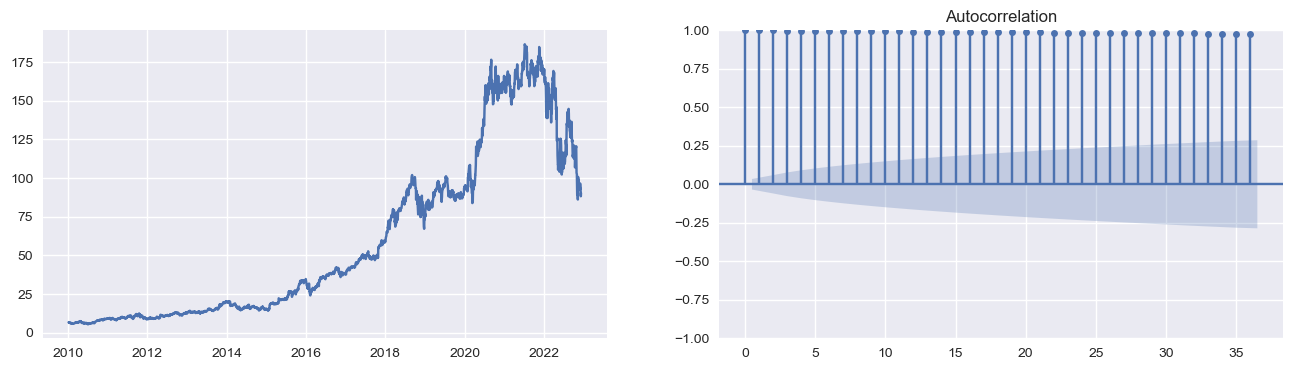

In [210]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
#Original
ax1.plot(df)
plot_acf(df, ax=ax2);

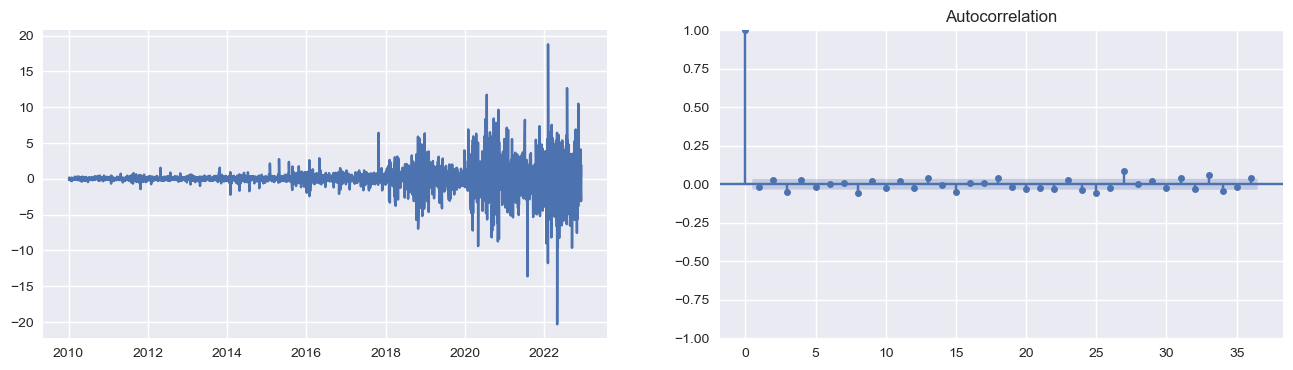

In [211]:
diff=df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
#DiffOne
ax1.plot(diff)
plot_acf(diff, ax=ax2);

In [212]:
from pmdarima.arima.utils import ndiffs

In [213]:
ndiffs(df.Close, test="adf")

1

In [214]:
#P--AR
from statsmodels.graphics.tsaplots import plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



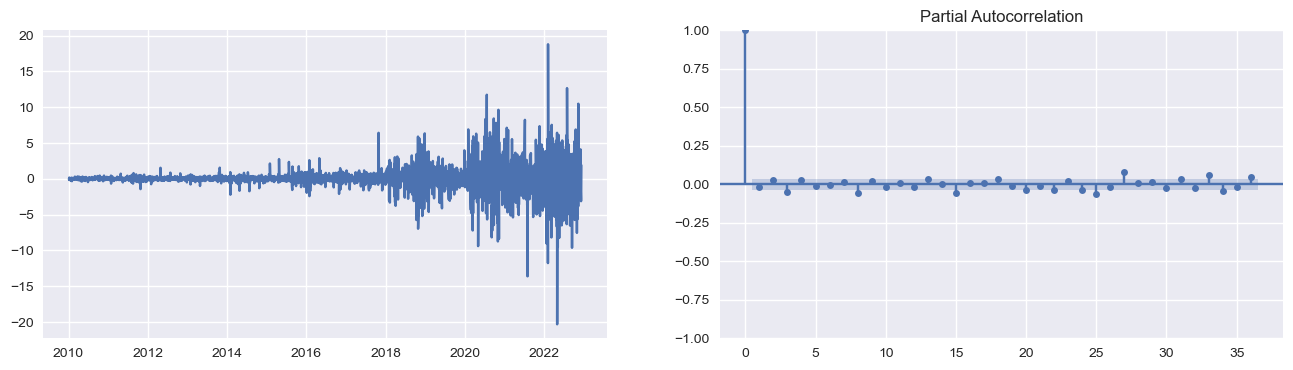

In [215]:
diff= df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize= (16,4))

ax1.plot(diff)
#DiffOnce
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

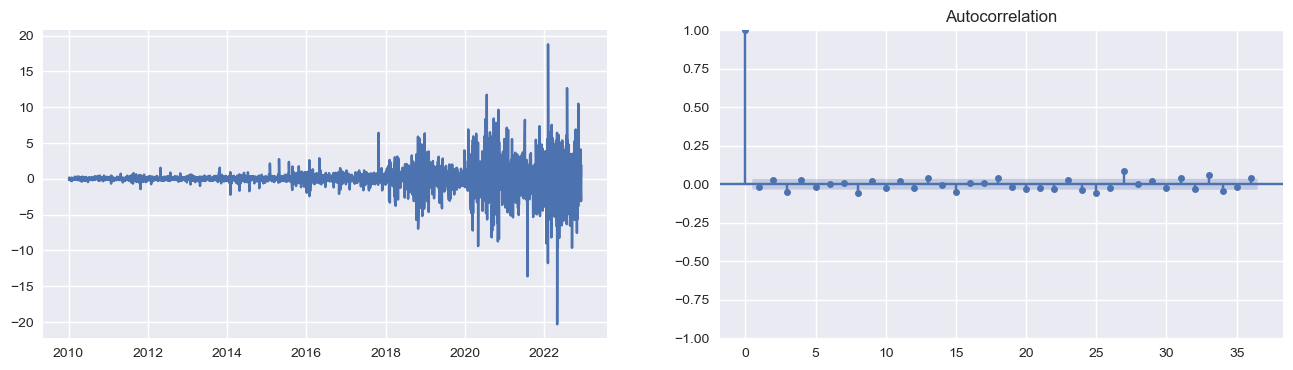

In [216]:
#Q--MA
diff= df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize= (16,4))

ax1.plot(diff)
#DiffOnce
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

In [217]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

In [218]:
train_ar = train_data.values
test_ar = test_data.values

In [219]:
from statsmodels.tsa.arima.model import ARIMA

In [230]:
model = ARIMA(train_ar, order=(3,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2605
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -3528.054
Date:                Tue, 13 Dec 2022   AIC                           7066.109
Time:                        19:31:02   BIC                           7095.433
Sample:                             0   HQIC                          7076.733
                               - 2605                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0375      0.496     -0.076      0.940      -1.010       0.935
ar.L2          0.0267      0.038      0.710      0.478      -0.047       0.100
ar.L3          0.0168      0.015      1.139      0.2

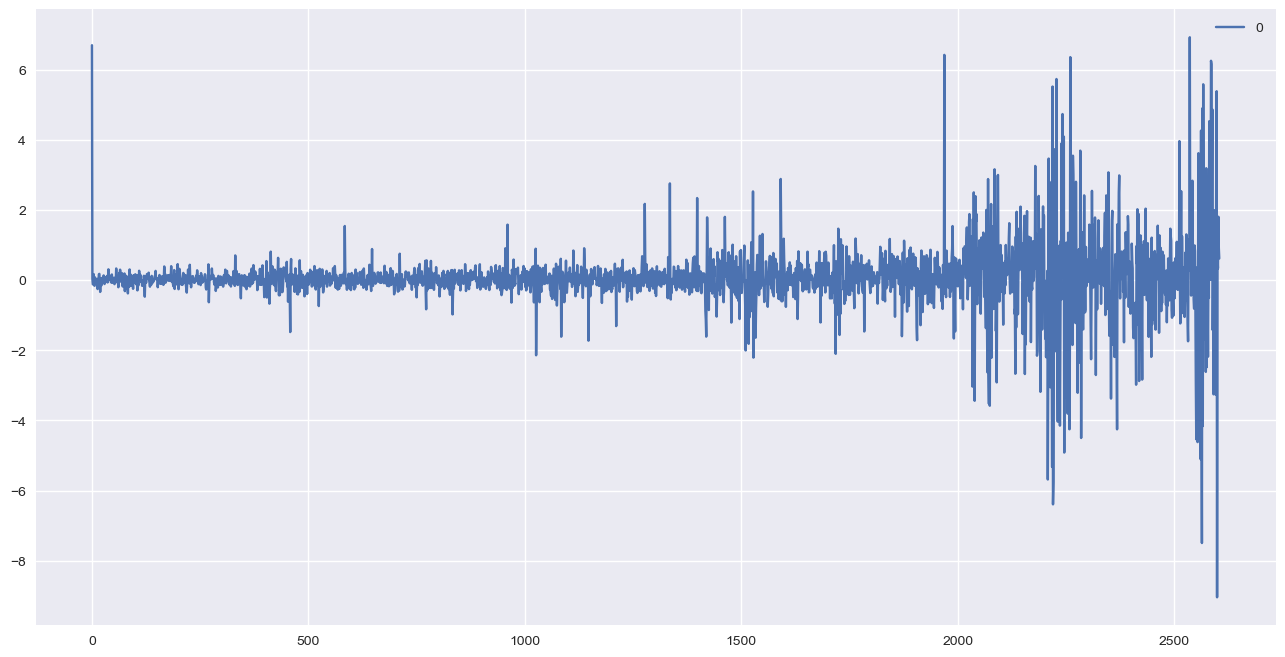

In [231]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [ ]:
#residuals.plot(kind='kde')
#plt.show()

In [233]:
# summary stats of residuals
print(residuals.describe())

                 0
count  2605.000000
mean      0.047037
std       0.945892
min      -9.040420
25%      -0.169858
50%       0.024074
75%       0.261661
max       6.922040


In [234]:
size = int(len(df) * 0.80)
train, test = df[0:size], df[size:len(df)]


In [235]:
X = df.values
X


array([[ 6.69500017],
       [ 6.73449993],
       [ 6.61250019],
       ...,
       [88.25      ],
       [88.45999908],
       [90.34999847]])

In [236]:
size = int(len(X) * 0.80)
print(size)

2605


In [267]:
train, test = X[0:size], X[size:len(X)]
print(train)
print(test)

[[  6.69500017]
 [  6.73449993]
 [  6.61250019]
 ...
 [117.56300354]
 [118.38050079]
 [118.98049927]]
[[120.44999695]
 [117.84750366]
 [118.39600372]
 [119.44249725]
 [120.48899841]
 [121.31300354]
 [122.46649933]
 [124.89700317]
 [122.33699799]
 [121.84400177]
 [121.09300232]
 [120.51950073]
 [120.05500031]
 [122.11849976]
 [123.55200195]
 [123.62049866]
 [123.91999817]
 [123.02999878]
 [124.15000153]
 [126.20300293]
 [130.04299927]
 [132.37249756]
 [127.89800262]
 [127.25099945]
 [128.63400269]
 [130.76350403]
 [132.04899597]
 [132.69900513]
 [133.75050354]
 [135.69099426]
 [138.22050476]
 [136.72000122]
 [137.72900391]
 [134.64349365]
 [134.01899719]
 [137.94099426]
 [143.93499756]
 [144.51499939]
 [152.852005  ]
 [150.0059967 ]
 [154.05549622]
 [159.13150024]
 [160.        ]
 [155.19999695]
 [154.19999695]
 [150.4434967 ]
 [149.99499512]
 [148.09849548]
 [159.84199524]
 [156.914505  ]
 [154.99549866]
 [149.32749939]
 [150.44549561]
 [152.76049805]
 [150.01649475]
 [151.67649841]
 [

In [239]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=118.985595, expected=120.449997
predicted=120.373759, expected=117.847504
predicted=118.088270, expected=118.396004
predicted=118.341601, expected=119.442497
predicted=119.342985, expected=120.488998
predicted=120.443087, expected=121.313004
predicted=121.296904, expected=122.466499
predicted=122.421051, expected=124.897003
predicted=124.788739, expected=122.336998
predicted=122.632914, expected=121.844002
predicted=121.900464, expected=121.093002
predicted=121.094712, expected=120.519501
predicted=120.533521, expected=120.055000
predicted=120.061630, expected=122.118500
predicted=121.944827, expected=123.552002
predicted=123.487887, expected=123.620499
predicted=123.682888, expected=123.919998
predicted=123.925222, expected=123.029999
predicted=123.103500, expected=124.150002
predicted=124.052393, expected=126.203003
predicted=126.066379, expected=130.042999
predicted=129.848345, expected=132.372498
predicted=132.362816, expected=127.898003
predicted=128.297857, expected=127

Test RMSE: 3.376


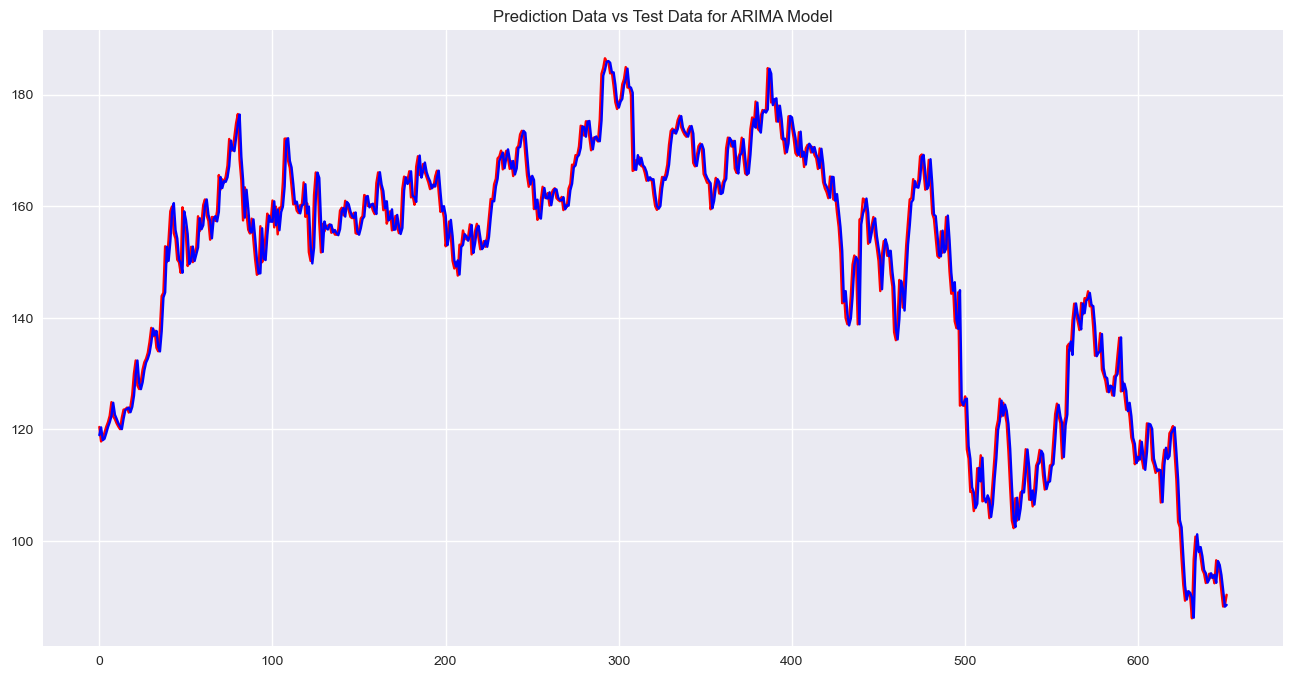

In [268]:
# evaluate forecasts
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test, color='red')
plt.plot(predictions, color='blue')
plt.title("Prediction Data vs Test Data for ARIMA Model")
plt.show()